In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

# （可选）挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 1. 读取两个文件
train_path = '/content/drive/MyDrive/fc25_train_stratified_by_position.csv'
test_path  = '/content/drive/MyDrive/fc25_test_stratified_by_position.csv'

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# 2. 删除 log_market_value 列
train_df = train_df.drop(columns=['log_market_value'])
test_df  = test_df.drop(columns=['log_market_value'])

# 3. 将 market_value_in_eur 转换为百万欧元单位
train_df['market_value_in_eur'] = train_df['market_value_in_eur'] / 1e6
test_df['market_value_in_eur']  = test_df['market_value_in_eur'] / 1e6

# 4. 保存处理后的文件
train_df.to_csv('/content/drive/MyDrive/fc25_train_processed.csv', index=False)
test_df .to_csv('/content/drive/MyDrive/fc25_test_processed.csv', index=False)

print("Processing complete:")
print("  Train shape:", train_df.shape)
print("  Test  shape:", test_df.shape)


Mounted at /content/drive
Processing complete:
  Train shape: (5800, 58)
  Test  shape: (1450, 58)


In [2]:
train_path = '/content/drive/MyDrive/fc25_train_processed.csv'
test_path  = '/content/drive/MyDrive/fc25_test_processed.csv'

# 3. 读取数据
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

groups = ['Attacker', 'Midfielder', 'Defender', 'Goalkeeper']

# 6. 拆分并保存
for grp in groups:
    # 训练集子集
    train_sub = train_df[train_df['position_group'] == grp]
    train_out = f'/content/drive/MyDrive/fc25_train_{grp.lower()}.csv'
    train_sub.to_csv(train_out, index=False)

    # 测试集子集
    test_sub = test_df[test_df['position_group'] == grp]
    test_out = f'/content/drive/MyDrive/fc25_test_{grp.lower()}.csv'
    test_sub.to_csv(test_out, index=False)

    print(f"{grp} → 训练集: {len(train_sub)} 行 -> {train_out}")
    print(f"{grp} → 测试集: {len(test_sub)} 行 -> {test_out}")

Attacker → 训练集: 1381 行 -> /content/drive/MyDrive/fc25_train_attacker.csv
Attacker → 测试集: 345 行 -> /content/drive/MyDrive/fc25_test_attacker.csv
Midfielder → 训练集: 1557 行 -> /content/drive/MyDrive/fc25_train_midfielder.csv
Midfielder → 测试集: 389 行 -> /content/drive/MyDrive/fc25_test_midfielder.csv
Defender → 训练集: 1554 行 -> /content/drive/MyDrive/fc25_train_defender.csv
Defender → 测试集: 389 行 -> /content/drive/MyDrive/fc25_test_defender.csv
Goalkeeper → 训练集: 1308 行 -> /content/drive/MyDrive/fc25_train_goalkeeper.csv
Goalkeeper → 测试集: 327 行 -> /content/drive/MyDrive/fc25_test_goalkeeper.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. 读取某一位置组的训练集（以 Attacker 为例）
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper.csv')

# 2. 指定不做标准化的列
no_scale = [
    'name', 'position', 'weak_foot', 'skill_moves',
    'market_value_in_eur', 'position_group', 'nation_fifa_ranking',
    'league_ranking_gfl', 'height_m', 'preferred_foot_binary',
    'pos_Attacker', 'pos_Defender', 'pos_Goalkeeper', 'pos_Midfielder'
]

# 4. 拆分：保留不做标准化的列，其它列做 Z‐score
df_no_scale = df[no_scale]
df_scale    = df.drop(columns=no_scale)

# 5. 对连续特征做 Z‐score
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scale)
df_scaled     = pd.DataFrame(scaled_values, columns=df_scale.columns, index=df.index)

# 6. 合并回去
df_processed = pd.concat([df_no_scale, df_scaled], axis=1)

# 7. 保存结果
out_path = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'
df_processed.to_csv(out_path, index=False)

print("Done! Processed shape:", df_processed.shape)


Done! Processed shape: (1308, 58)


In [3]:
# 在测试集上
# 1. 读取并删除 gk_*、保留 no_scale，以及拆分出 df_test_continuous
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_goalkeeper.csv')
df_test_no_scale = df_test[no_scale]
df_test_continuous = df_test.drop(columns=no_scale)

# 2. 直接使用训练时的 scaler 去 transform
df_test_scaled = scaler.transform(df_test_continuous)

# 3. 拼回并保存
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test_continuous.columns, index=df_test.index)
df_test_processed = pd.concat([df_test_no_scale, df_test_scaled], axis=1)
df_test_processed.to_csv('/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv', index=False)


In [30]:
import pandas as pd

# 1. 读取原始数据集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'
df = pd.read_csv(train_file)

# 2. 定义要删除的列
cols_to_drop = ['gk_diving','gk_handling','gk_kicking','gk_positioning',
    'gk_reflexes' ]

# 3. 删除这些列
df_cleaned = df.drop(columns=cols_to_drop)

# 4. 另存为新文件
output_file = '/content/drive/MyDrive/fc25_train_goalkeeper_no5.csv'
df_cleaned.to_csv(output_file, index=False)

print(f"Saved cleaned dataset without {cols_to_drop} to:\n{output_file}")


Saved cleaned dataset without ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'] to:
/content/drive/MyDrive/fc25_train_goalkeeper_no5.csv


In [37]:
import pandas as pd

# 1. 读取原始数据集
train_file = '/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv'
df = pd.read_csv(train_file)

# 2. 定义要删除的列
cols_to_drop = ['gk_diving','gk_handling','gk_kicking','gk_positioning',
    'gk_reflexes' ]

# 3. 删除这些列
df_cleaned = df.drop(columns=cols_to_drop)

# 4. 另存为新文件
output_file = '/content/drive/MyDrive/fc25_test_goalkeeper_no5.csv'
df_cleaned.to_csv(output_file, index=False)

print(f"Saved cleaned dataset without {cols_to_drop} to:\n{output_file}")

Saved cleaned dataset without ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'] to:
/content/drive/MyDrive/fc25_test_goalkeeper_no5.csv


Baseline: linear regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')  # 改成你的路径

# 2. 构造 X 和 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. CV 设置
seeds    = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

# 4. 5-seed × 5-fold 验证
for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for tr_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

        # 5. 训练 & 评估
        model = LinearRegression()
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 6. 汇总结果
print("LinearRegression — 5 seeds × 5 folds 验证结果：")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")




LinearRegression — 5 seeds × 5 folds 验证结果：
Total folds: 25
RMSE: 3.0275 ± 0.3302
MAE : 1.8704 ± 0.1194
R²  : 0.4594 ± 0.1135


In [38]:
# 3. 读取处理好的训练集和测试集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'
test_file  = '/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv'
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

# 4. 定义要排除的列
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']

# 5. 构造训练和测试的特征矩阵 X 和目标向量 y
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_in_eur']
X_test  = test_df.drop(columns=exclude)
y_test  = test_df['market_value_in_eur']

# 6. 训练最终模型
model = LinearRegression()
model.fit(X_train, y_train)

# 7. 在测试集上预测并评估
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("Test Set Evaluation:")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


Test Set Evaluation:
Samples: 327
RMSE: 2.7203
MAE : 1.7471
R²  : 0.3528


In [39]:
# 3. 读取处理好的训练集和测试集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_no5.csv'
test_file  = '/content/drive/MyDrive/fc25_test_goalkeeper_no5.csv'
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

# 4. 定义要排除的列
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']

# 5. 构造训练和测试的特征矩阵 X 和目标向量 y
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_in_eur']
X_test  = test_df.drop(columns=exclude)
y_test  = test_df['market_value_in_eur']

# 6. 训练最终模型
model = LinearRegression()
model.fit(X_train, y_train)

# 7. 在测试集上预测并评估
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("Test Set Evaluation:")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Test Set Evaluation:
Samples: 327
RMSE: 2.7203
MAE : 1.7471
R²  : 0.3528


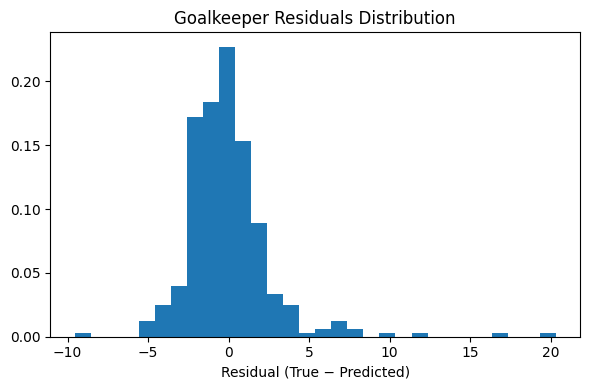

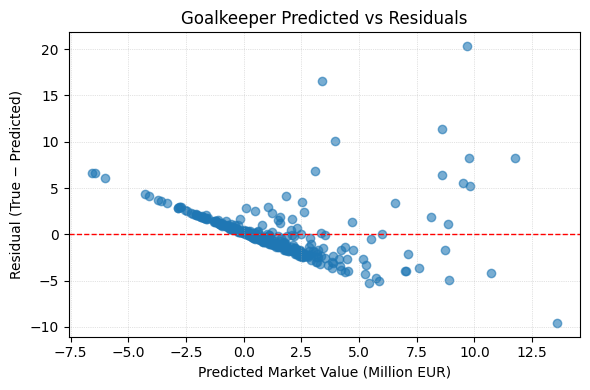

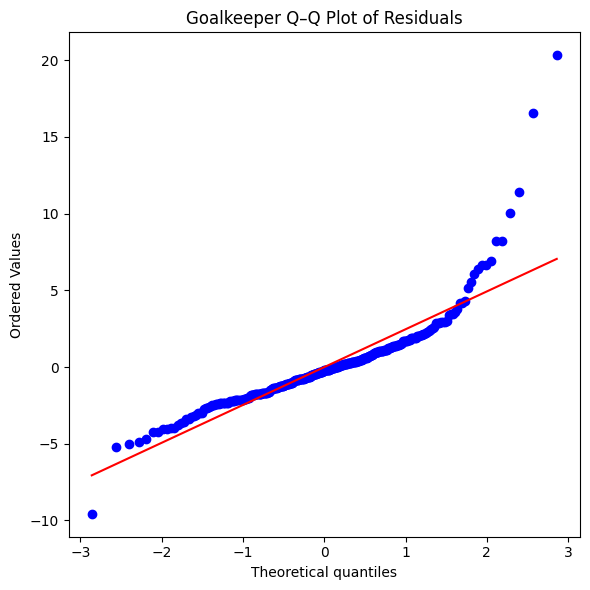

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 假设你已有 y_test 和 y_pred，或者先运行：
# import numpy as np
# from sklearn.linear_model import LinearRegression
# model = LinearRegression().fit(X_train, y_train)
# y_pred = model.predict(X_test)

# 生成残差
residuals = y_test - y_pred

# 1) 残差分布直方图
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30,density=True)
plt.xlabel("Residual (True − Predicted)")
plt.title("Goalkeeper Residuals Distribution")
plt.tight_layout()
plt.show()

# 2) 预测值 vs 残差 散点图
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Market Value (Million EUR)")
plt.ylabel("Residual (True − Predicted)")
plt.title("Goalkeeper Predicted vs Residuals")
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 3) 残差 Q–Q 图
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Goalkeeper Q–Q Plot of Residuals")
plt.tight_layout()
plt.show()


Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 3. 读取训练集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'  # 修改为你的文件名
df = pd.read_csv(train_file)

# 4. 构造特征 X 和目标 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 5. 定义种子列表和折数
seeds = [91, 22, 67, 2025, 623]
n_splits = 5

# 6. 存储所有折次的评估结果
rmse_scores, mae_scores, r2_scores = [], [], []

# 7. 循环随机种子 + KFold
for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 初始化并训练 Random Forest
        rf = RandomForestRegressor(
            bootstrap =False,
            max_depth= 40,
            max_features= 'sqrt',
            min_samples_leaf= 3,
            min_samples_split= 2,
            n_estimators=101,
            random_state= 42,
            n_jobs= -1)

        rf.fit(X_tr, y_tr)
        y_pred = rf.predict(X_val)

        # 计算并收集指标
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))

# 8. 输出汇总结果
print("Random Forest 5-seed, 5-fold CV on training set:")
print(f"Folds evaluated: {len(rmse_scores)}")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")


Random Forest 5-seed, 5-fold CV on training set:
Folds evaluated: 25
RMSE: 2.2439 ± 0.4800
MAE : 0.8847 ± 0.1412
R²  : 0.7023 ± 0.1050


In [23]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 3. 读取训练集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'  # 修改为你的文件名
df = pd.read_csv(train_file)

# 4. 构造特征 X 和目标 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name','gk_diving','gk_handling','gk_kicking','gk_positioning',
    'gk_reflexes' ]
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 5. 定义种子列表和折数
seeds = [91, 22, 67, 2025, 623]
n_splits = 5

# 6. 存储所有折次的评估结果
rmse_scores, mae_scores, r2_scores = [], [], []

# 7. 循环随机种子 + KFold
for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 初始化并训练 Random Forest
        rf = RandomForestRegressor(
            bootstrap =False,
            max_depth= 40,
            max_features= 'sqrt',
            min_samples_leaf= 3,
            min_samples_split= 2,
            n_estimators=101,
            random_state= 42,
            n_jobs= -1)

        rf.fit(X_tr, y_tr)
        y_pred = rf.predict(X_val)

        # 计算并收集指标
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
        r2_scores.append(r2_score(y_val, y_pred))

# 8. 输出汇总结果
print("Random Forest 5-seed, 5-fold CV on training set:")
print(f"Folds evaluated: {len(rmse_scores)}")
print(f"RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAE : {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"R²  : {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")


Random Forest 5-seed, 5-fold CV on training set:
Folds evaluated: 25
RMSE: 2.2004 ± 0.4820
MAE : 0.8791 ± 0.1423
R²  : 0.7132 ± 0.1055


In [11]:


import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, mean_absolute_error

df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
exclude = ['market_value_in_eur','position','position_group','name']
X_att = df.drop(columns=exclude)
y_att = df['market_value_in_eur']

# 2. 定义模型和超参空间
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
param_dist = {
    'n_estimators':      randint(150,351),     # 100–300 棵树
    'max_depth':         [None] + list(range(5, 21)),       # 深度 10–25
    'min_samples_split': randint(2, 11),         # 分裂所需最少样本 2–8
    'min_samples_leaf':  randint(1, 6),         # 叶子最少样本 1–5
    'max_features':       list(np.linspace(0.3, 0.7, 5)),  # 0.3–0.7
    'bootstrap':         [True, False]
}

# 3. 定义 CV 与 MAE scorer
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 4. RandomizedSearchCV
search_att = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,             # 尝试 120 组参数
    scoring=mae_scorer,     # 以 MAE 最小作为目标
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    refit=True              # 自动在全 X_att,y_att 上 refit
)

# 5. 运行超参搜索
search_att.fit(X_att, y_att)

# 6. 输出最优参数 & CV MAE
print("Best params for Goalkeeper subset:", search_att.best_params_)
print("Best CV MAE (million EUR):", -search_att.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best params for Goalkeeper subset: {'bootstrap': False, 'max_depth': 15, 'max_features': np.float64(0.6), 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 241}
Best CV MAE (million EUR): 0.7990281811189822


In [24]:


# 2. 导入库
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 3. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
exclude = ['market_value_in_eur','position','position_group','name','gk_diving','gk_handling','gk_kicking','gk_positioning',
    'gk_reflexes']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 4. 最优参数（替换成你实际的 best_params 字典）
best_params = search_att.best_params_

# 5. 5-seed, 5-fold CV
seeds = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 6. 用 best_params 初始化模型
        rf = RandomForestRegressor(
            **best_params,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_tr, y_tr)
        y_pred = rf.predict(X_val)

        # 7. 计算指标
        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 8. 输出汇总
print("5-seed, 5-fold CV with tuned RF on Attacker train:")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


5-seed, 5-fold CV with tuned RF on Attacker train:
Total folds: 25
RMSE: 2.0786 ± 0.5031
MAE : 0.7954 ± 0.1318
R²  : 0.7425 ± 0.1034


In [25]:


# 2. 导入库
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 3. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
exclude = ['market_value_in_eur','position','position_group','name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 4. 最优参数（替换成你实际的 best_params 字典）
best_params = search_att.best_params_

# 5. 5-seed, 5-fold CV
seeds = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 6. 用 best_params 初始化模型
        rf = RandomForestRegressor(
            **best_params,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_tr, y_tr)
        y_pred = rf.predict(X_val)

        # 7. 计算指标
        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 8. 输出汇总
print("5-seed, 5-fold CV with tuned RF on Attacker train:")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

5-seed, 5-fold CV with tuned RF on Attacker train:
Total folds: 25
RMSE: 2.1353 ± 0.5323
MAE : 0.8121 ± 0.1337
R²  : 0.7281 ± 0.1114


In [40]:
from sklearn.ensemble import RandomForestRegressor

# 3. 读取训练集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'  # 修改为你的文件名
df = pd.read_csv(train_file)

# 4. 构造特征 X 和目标 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X_train = df.drop(columns=exclude)
y_train = df['market_value_in_eur']
# 假设 best_params 是你从 RandomizedSearchCV 得到的字典

# best_params_ 是字典，里面包含了最优超参数
best_params = search_att.best_params_

# 用这些参数再构造一个新的 RandomForestRegressor
rf_final = RandomForestRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

# 然后在整个训练集上训练
rf_final.fit(X_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=15,
                      max_features=np.float64(0.6), min_samples_leaf=4,
                      min_samples_split=8, n_estimators=241, n_jobs=-1,
                      random_state=42)

In [41]:
# 3. 读取处理好的训练集和测试集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'
test_file  = '/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv'
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

# 4. 定义要排除的列
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']

# 5. 构造训练和测试的特征矩阵 X 和目标向量 y
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_in_eur']
X_test  = test_df.drop(columns=exclude)
y_test  = test_df['market_value_in_eur']


# 7. 在测试集上预测并评估

y_pred_1 = rf_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
mae  = mean_absolute_error(y_test, y_pred_1)
r2   = r2_score(y_test, y_pred_1)

print("Test Set Evaluation:")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Test Set Evaluation:
Samples: 327
RMSE: 2.2907
MAE : 0.8212
R²  : 0.5410


In [28]:
from sklearn.ensemble import RandomForestRegressor

# 3. 读取训练集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'  # 修改为你的文件名
df = pd.read_csv(train_file)

# 4. 构造特征 X 和目标 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name', 'gk_diving','gk_handling','gk_kicking','gk_positioning']
X_train = df.drop(columns=exclude)
y_train = df['market_value_in_eur']
# 假设 best_params 是你从 RandomizedSearchCV 得到的字典

# best_params_ 是字典，里面包含了最优超参数
best_params = search_att.best_params_

# 用这些参数再构造一个新的 RandomForestRegressor
rf_final = RandomForestRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

# 然后在整个训练集上训练
rf_final.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=15,
                      max_features=np.float64(0.6), min_samples_leaf=4,
                      min_samples_split=8, n_estimators=241, n_jobs=-1,
                      random_state=42)

In [29]:
# 3. 读取处理好的训练集和测试集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'
test_file  = '/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv'
train_df = pd.read_csv(train_file)
test_df  = pd.read_csv(test_file)

# 4. 定义要排除的列
exclude = ['market_value_in_eur', 'position', 'position_group', 'name', 'gk_diving','gk_handling','gk_kicking','gk_positioning']

# 5. 构造训练和测试的特征矩阵 X 和目标向量 y
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_in_eur']
X_test  = test_df.drop(columns=exclude)
y_test  = test_df['market_value_in_eur']


# 7. 在测试集上预测并评估

y_pred_1 = rf_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
mae  = mean_absolute_error(y_test, y_pred_1)
r2   = r2_score(y_test, y_pred_1)

print("Test Set Evaluation:")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Test Set Evaluation:
Samples: 327
RMSE: 2.2501
MAE : 0.8266
R²  : 0.5572


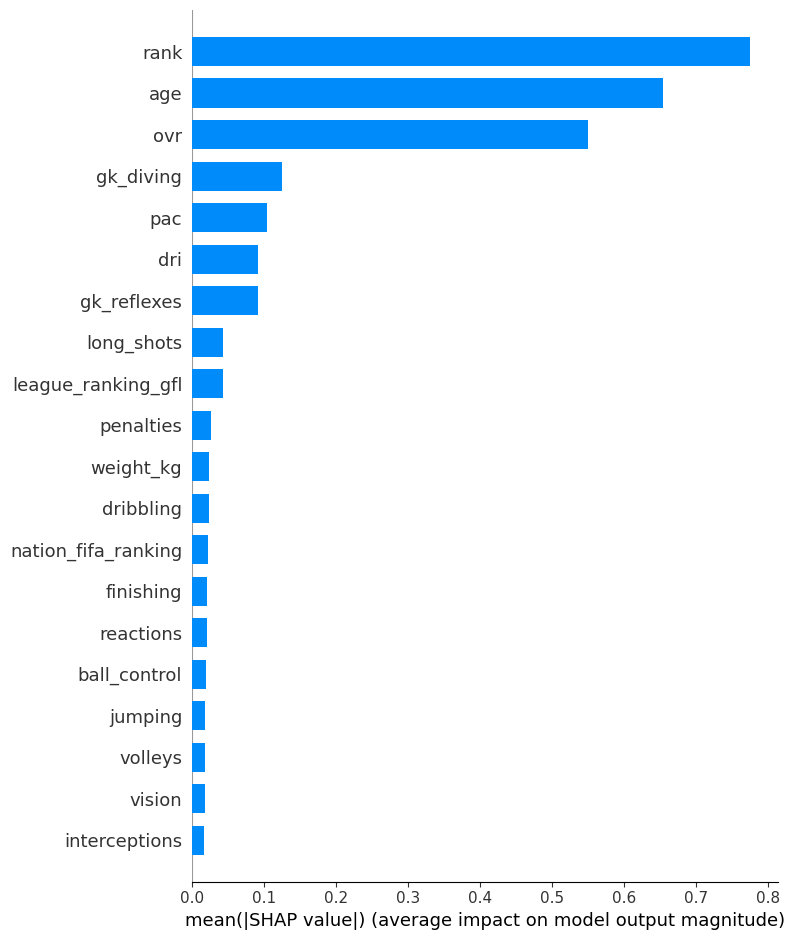

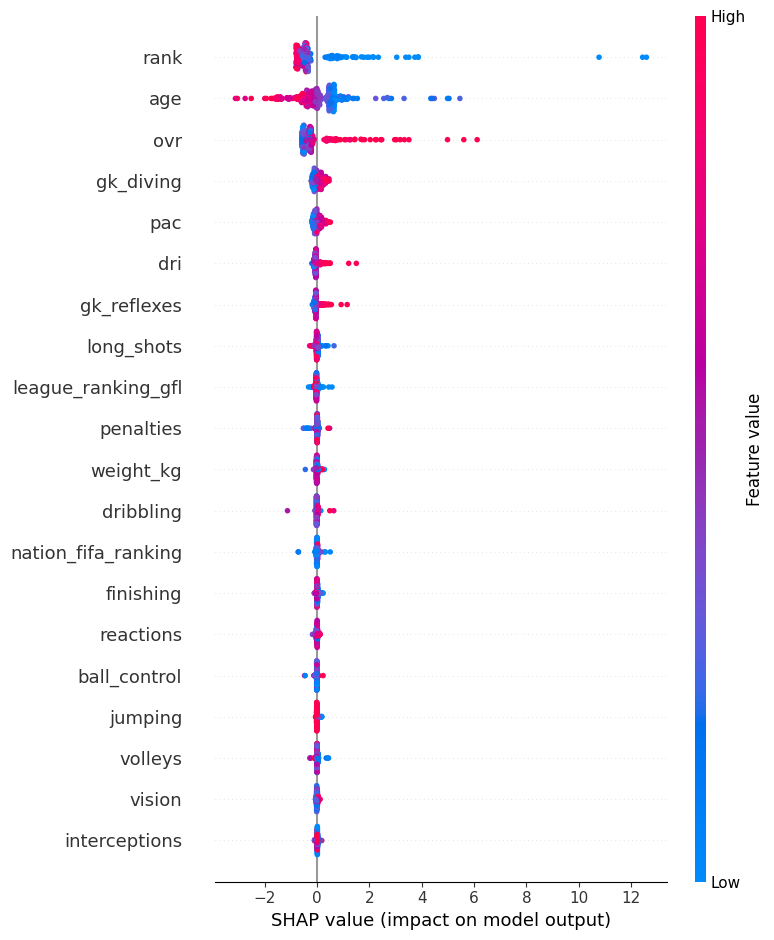

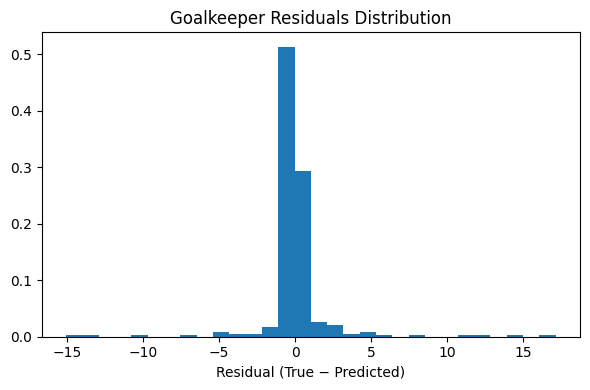

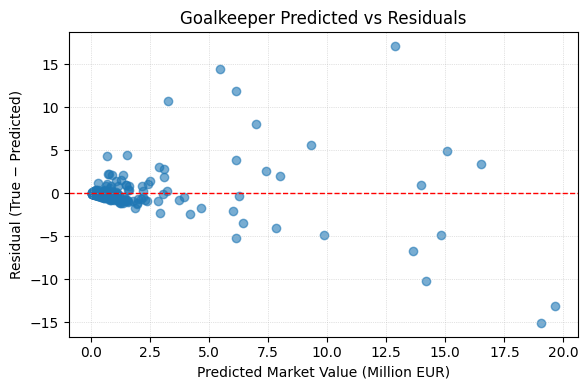

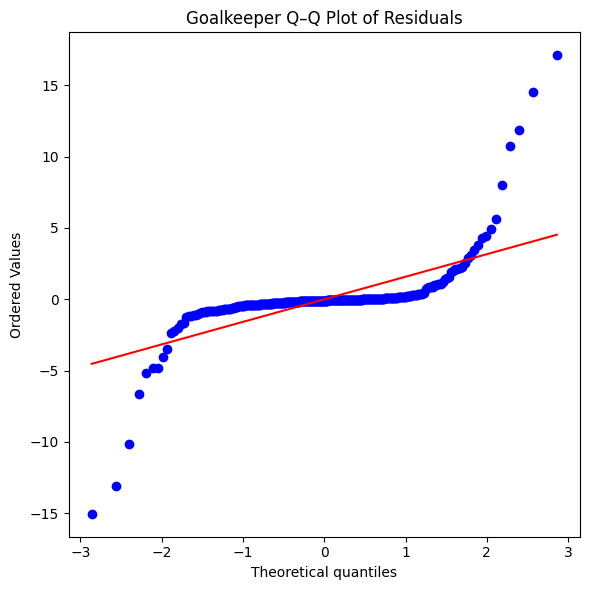

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
import seaborn as sns

# 1. 读取处理好的训练集和测试集
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv')

# 2. 构造 X_train, y_train, X_test, y_test
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_in_eur']
X_test  = test_df.drop(columns=exclude)
y_test  = test_df['market_value_in_eur']

# 3. 加载训练好的最佳 RF 模型 (rf_final)，或者直接引用已存在对象
# 假设 rf_final 已经在环境中
# from your_module import rf_final

# 4. SHAP 特征重要性 (使用 TreeExplainer)
explainer = shap.TreeExplainer(rf_final)
shap_values = explainer.shap_values(X_test)

# 5. 全局重要性条形图
shap.summary_plot(shap_values, X_test, plot_type="bar",
    feature_names=X_test.columns,
    max_display=20)

# 6. Beeswarm 关系图
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,
    max_display=20)

# 7. 残差分析
residuals = y_test - y_pred_1


# 1) 残差分布直方图
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30,density=True)
plt.xlabel("Residual (True − Predicted)")
plt.title("Goalkeeper Residuals Distribution")
plt.tight_layout()
plt.show()

# 2) 预测值 vs 残差 散点图
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_1, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Market Value (Million EUR)")
plt.ylabel("Residual (True − Predicted)")
plt.title("Goalkeeper Predicted vs Residuals")
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 3) 残差 Q–Q 图
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Goalkeeper Q–Q Plot of Residuals")
plt.tight_layout()
plt.show()

XGBoost

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')  # 替换成你的路径

# 2. 构造特征矩阵 X 和目标 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. 模型初始化（Baseline XGBoost）
# 默认 objective='reg:squarederror'
xgb_params = {
    'n_estimators'   : 200,
    'learning_rate'  : 0.1,
    'max_depth'      : 5,
    'random_state'   : 42,
    'n_jobs'         : -1,
    'verbosity'      : 0
}

# 4. 5 个不同 seed × 5 折交叉验证
seeds    = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = XGBRegressor(**xgb_params)
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_val)
        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 5. 汇总并打印结果
print("XGBRegressor — 5 seeds × 5 folds 验证结果：")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


XGBRegressor — 5 seeds × 5 folds 验证结果：
Total folds: 25
RMSE: 2.1126 ± 0.5283
MAE : 0.8031 ± 0.1386
R²  : 0.7337 ± 0.1062


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')  # 替换成你的路径

# 2. 构造特征矩阵 X 和目标 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name','gk_diving','gk_handling','gk_kicking','gk_positioning',
    'gk_reflexes']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. 模型初始化（Baseline XGBoost）
# 默认 objective='reg:squarederror'
xgb_params = {
    'n_estimators'   : 200,
    'learning_rate'  : 0.1,
    'max_depth'      : 5,
    'random_state'   : 42,
    'n_jobs'         : -1,
    'verbosity'      : 0
}

# 4. 5 个不同 seed × 5 折交叉验证
seeds    = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = XGBRegressor(**xgb_params)
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_val)
        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 5. 汇总并打印结果
print("XGBRegressor — 5 seeds × 5 folds 验证结果：")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


XGBRegressor — 5 seeds × 5 folds 验证结果：
Total folds: 25
RMSE: 2.1126 ± 0.5283
MAE : 0.8031 ± 0.1386
R²  : 0.7337 ± 0.1062


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from scipy.stats import randint, uniform
from google.colab import drive

# —— 1. 挂载 Google Drive 并读取数据 ——
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
X = df.drop(columns=['market_value_in_eur','position','position_group','name'])
y = df['market_value_in_eur']

# —— 2. 基础模型 & MAE scorer ——
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# —— 3. 连续分布的超参区间 ——
param_dist = {
    'n_estimators'     : randint(100, 501),       # 100–500 棵树
    'learning_rate'    : uniform(0.01, 0.19),     # 0.01–0.20
    'max_depth'        : randint(3, 11),          # 3–10 层
    'subsample'        : uniform(0.6, 0.4),       # 0.6–1.0
    'colsample_bytree' : uniform(0.6, 0.4),       # 0.6–1.0
    'reg_alpha'        : uniform(0.0, 1.0),       # 0.0–1.0
    'reg_lambda'       : uniform(0.5, 1.5),       # 0.5–2.0
}

# —— 4. 5 折 CV + 100 次随机搜索 ——
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring=mae_scorer,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# —— 5. 运行调参 & 输出结果 ——
rand_search.fit(X, y)

print("最佳 MAE:", -rand_search.best_score_)
print("最佳参数:", rand_search.best_params_)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 100 candidates, totalling 500 fits
最佳 MAE: 0.7990508696021121
最佳参数: {'colsample_bytree': np.float64(0.9604632041963956), 'learning_rate': np.float64(0.018634812264876996), 'max_depth': 6, 'n_estimators': 429, 'reg_alpha': np.float64(0.9504114840765587), 'reg_lambda': np.float64(1.8353956758363745), 'subsample': np.float64(0.7822627011142852)}


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
X = df.drop(columns=['market_value_in_eur', 'position', 'position_group', 'name'])
y = df['market_value_in_eur']

# 2. 调优后最佳参数
best_params = rand_search.best_params_

# 3. 构造模型
model = XGBRegressor(**best_params)

# 4. 5 seeds × 5-fold CV
seeds    = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 5. 打印结果
print("Tuned XGBRegressor — 5 seeds × 5 folds on Training Set:")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


Tuned XGBRegressor — 5 seeds × 5 folds on Training Set:
Total folds: 25
RMSE: 2.0644 ± 0.4964
MAE : 0.7693 ± 0.1264
R²  : 0.7458 ± 0.0995


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取数据
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
X = df.drop(columns=['market_value_in_eur', 'position', 'position_group', 'name','gk_diving','gk_handling','gk_kicking','gk_positioning',
    'gk_reflexes'])
y = df['market_value_in_eur']

# 2. 调优后最佳参数
best_params = rand_search.best_params_

# 3. 构造模型
model = XGBRegressor(**best_params)

# 4. 5 seeds × 5-fold CV
seeds    = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 5. 打印结果
print("Tuned XGBRegressor — 5 seeds × 5 folds on Training Set:")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


Tuned XGBRegressor — 5 seeds × 5 folds on Training Set:
Total folds: 25
RMSE: 2.0708 ± 0.4951
MAE : 0.7730 ± 0.1278
R²  : 0.7449 ± 0.0967


In [ ]:
import pandas as pd
from xgboost import XGBRegressor

# —— 1. 读取训练集 & 预测集 CSV ——
train_path = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'    # 或者本地路径
test_path  = '/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv'     # 请替换为实际路径

df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

exclude = ['market_value_in_eur', 'position', 'position_group', 'name']

X_train = df_train.drop(columns=exclude)
y_train = df_train['market_value_in_eur']

X_test = df_test.drop(columns=exclude)
y_test = df_test['market_value_in_eur']

# —— 2. 调优后最佳参数 ——
best_params = rand_search.best_params_

# —— 3. 训练 & 预测 ——
model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

y_pred_2 = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
mae  = mean_absolute_error(y_test, y_pred_2)
r2   = r2_score(y_test, y_pred_2)

print("Test Set Evaluation (XGBRegressor):")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")



Test Set Evaluation (XGBRegressor):
Samples: 327
RMSE: 1.8752
MAE : 0.7167
R²  : 0.6924


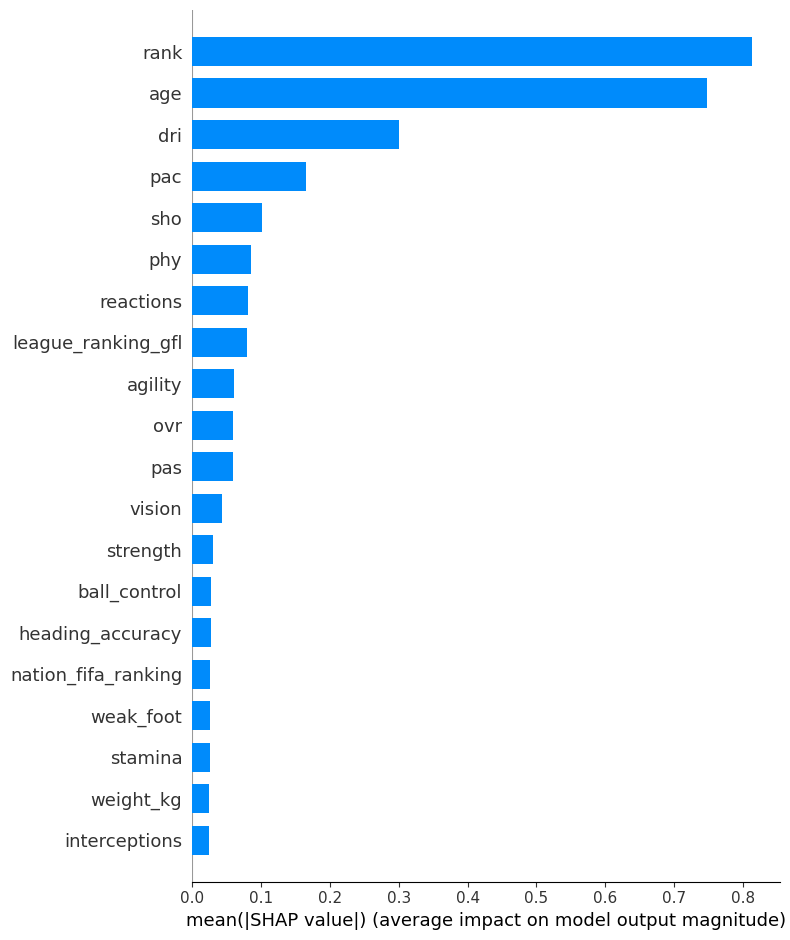

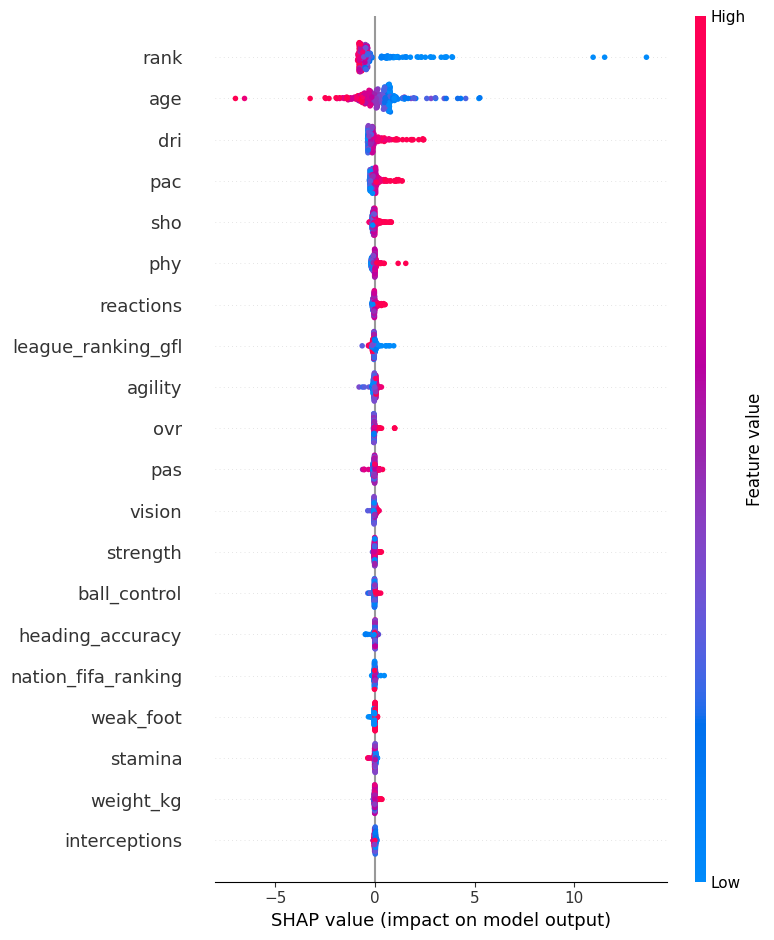

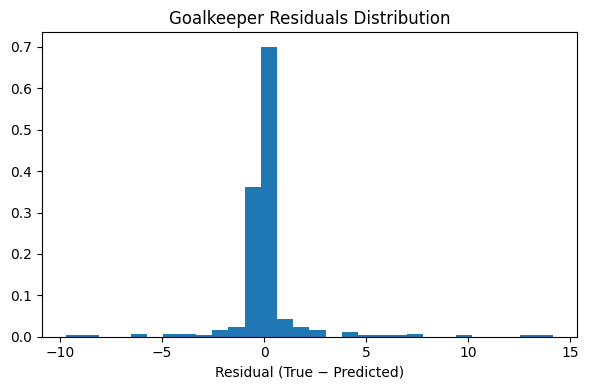

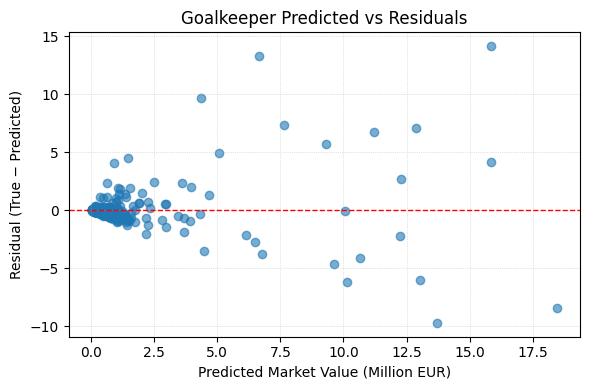

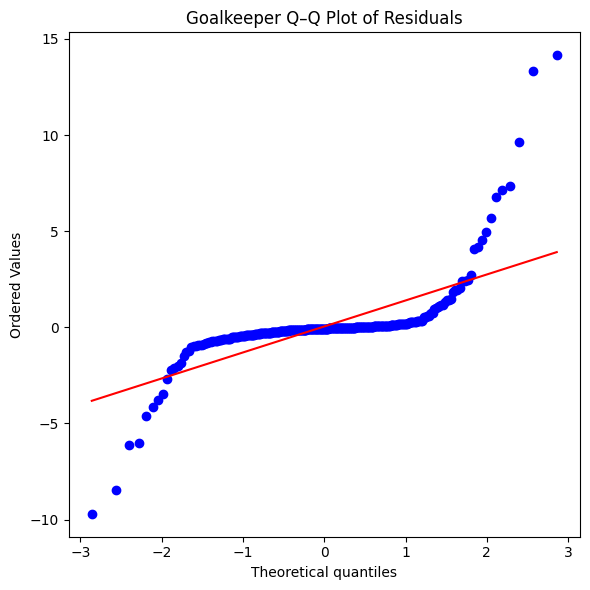

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
import seaborn as sns

# 1. 读取处理好的训练集和测试集
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv')

# 2. 构造 X_train, y_train, X_test, y_test
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_in_eur']
X_test  = test_df.drop(columns=exclude)
y_test  = test_df['market_value_in_eur']

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar",
    feature_names=X_test.columns,
    max_display=20)

# 6. Beeswarm 关系图
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,
    max_display=20)



# 假设你已有 y_test 和 y_pred，或者先运行：
# import numpy as np
# from sklearn.linear_model import LinearRegression
# model = LinearRegression().fit(X_train, y_train)
# y_pred = model.predict(X_test)

# 生成残差
residuals = y_test - y_pred_2

# 1) 残差分布直方图
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30,density=True)
plt.xlabel("Residual (True − Predicted)")
plt.title("Goalkeeper Residuals Distribution")
plt.tight_layout()
plt.show()

# 2) 预测值 vs 残差 散点图
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_2, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Market Value (Million EUR)")
plt.ylabel("Residual (True − Predicted)")
plt.title("Goalkeeper Predicted vs Residuals")
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 3) 残差 Q–Q 图
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Goalkeeper Q–Q Plot of Residuals")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from xgboost import XGBRegressor

# —— 1. 读取训练集 & 预测集 CSV ——
train_path = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'    # 或者本地路径
test_path  = '/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv'     # 请替换为实际路径

df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

exclude = ['market_value_in_eur', 'position', 'position_group', 'name', 'gk_diving','gk_handling','gk_kicking','gk_positioning',
    'gk_reflexes']

X_train = df_train.drop(columns=exclude)
y_train = df_train['market_value_in_eur']

X_test = df_test.drop(columns=exclude)
y_test = df_test['market_value_in_eur']

# —— 2. 调优后最佳参数 ——
best_params = rand_search.best_params_

# —— 3. 训练 & 预测 ——
model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

y_pred_2 = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
mae  = mean_absolute_error(y_test, y_pred_2)
r2   = r2_score(y_test, y_pred_2)

print("Test Set Evaluation (XGBRegressor):")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


Test Set Evaluation (XGBRegressor):
Samples: 327
RMSE: 1.9207
MAE : 0.7328
R²  : 0.6773


LightGBM

In [51]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取已处理好的训练集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'
df = pd.read_csv(train_file)

# 2. 构造特征矩阵 X 和目标向量 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. 定义 LightGBM 模型（基线参数）
lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

# 4. 5 折 × 5 个随机种子 CV
seeds = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 训练并预测
        lgbm.fit(X_tr, y_tr)
        y_pred = lgbm.predict(X_val)

        # 计算指标
        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 5. 汇总并打印
print("LightGBM 5-seed, 5-fold CV on Training Set:")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


LightGBM 5-seed, 5-fold CV on Training Set:
Total folds: 25
RMSE: 2.1648 ± 0.3498
MAE : 0.8841 ± 0.1401
R²  : 0.7206 ± 0.0883


In [52]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取已处理好的训练集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_no5.csv'
df = pd.read_csv(train_file)

# 2. 构造特征矩阵 X 和目标向量 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. 定义 LightGBM 模型（基线参数）
lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

# 4. 5 折 × 5 个随机种子 CV
seeds = [91, 22, 67, 2025, 623]
n_splits = 5

rmse_list, mae_list, r2_list = [], [], []

for seed in seeds:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 训练并预测
        lgbm.fit(X_tr, y_tr)
        y_pred = lgbm.predict(X_val)

        # 计算指标
        rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        mae_list.append(mean_absolute_error(y_val, y_pred))
        r2_list.append(r2_score(y_val, y_pred))

# 5. 汇总并打印
print("LightGBM 5-seed, 5-fold CV on Training Set:")
print(f"Total folds: {len(rmse_list)}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"MAE : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"R²  : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


LightGBM 5-seed, 5-fold CV on Training Set:
Total folds: 25
RMSE: 2.1553 ± 0.3483
MAE : 0.8827 ± 0.1396
R²  : 0.7237 ± 0.0859


In [53]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, mean_absolute_error

# 1. 读取门将子集训练集
train_file = '/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv'
df = pd.read_csv(train_file)

# 2. 构造特征矩阵 X 和目标 y
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. 定义超参数分布
param_dist = {
    'n_estimators':       randint(100, 501),    # 100–500 棵树
    'learning_rate':      uniform(0.01, 0.09),  # 0.01–0.10
    'num_leaves':         randint(20, 151),     # 20–150 叶子数
    'max_depth':          randint(3, 13),       # 3–12 层
    'min_child_samples':  randint(5, 51),       # 5–50 叶子最小样本
    'subsample':          uniform(0.6, 0.4),    # 0.6–1.0 行采样
    'colsample_bytree':   uniform(0.6, 0.4),    # 0.6–1.0 列采样
    'reg_alpha':          uniform(0, 1),        # L1 正则
    'reg_lambda':         uniform(0, 1),        # L2 正则
    'min_split_gain':     uniform(0, 0.5)       # 分裂最小增益
}

# 4. 设置 5-Fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. 定义模型与 RandomizedSearchCV（MAE 作为评分）
lgbm = LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,               # 尝试 80 组超参
    scoring=mae_scorer,      # 最小化 MAE
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# 6. 执行搜索
search.fit(X, y)

# 7. 输出最优超参与 CV MAE
best_params = search.best_params_
best_mae    = -search.best_score_

print("Best hyperparameters for LightGBM (MAE):")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Best CV MAE: {best_mae:.4f} Million EUR")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters for LightGBM (MAE):
  colsample_bytree: 0.6488351818802693
  learning_rate: 0.04206680542692774
  max_depth: 3
  min_child_samples: 5
  min_split_gain: 0.11396758127097084
  n_estimators: 220
  num_leaves: 135
  reg_alpha: 0.352568856334169
  reg_lambda: 0.30478125815802903
  subsample: 0.6658623412571767
Best CV MAE: 0.7759 Million EUR


In [62]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取训练集
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')

# 2. 准备 X, y
exclude = ['market_value_in_eur','position','position_group','name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. 获取已调优的最佳模型
best_lgbm = search.best_estimator_

# 4. 5-seed × 5-fold CV
seeds = [91,22,67,2025,623]
kf_list = []
rmse, mae, r2 = [], [], []

for seed in seeds:
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        best_lgbm.fit(X_tr, y_tr)
        pred = best_lgbm.predict(X_val)
        rmse.append(np.sqrt(mean_squared_error(y_val, pred)))
        mae.append(mean_absolute_error(y_val, pred))
        r2.append(r2_score(y_val, pred))

print("Tuned LightGBM — 5-seed, 5-fold CV:")
print(f"RMSE: {np.mean(rmse):.4f} ± {np.std(rmse):.4f}")
print(f"MAE : {np.mean(mae):.4f} ± {np.std(mae):.4f}")
print(f"R²  : {np.mean(r2):.4f} ± {np.std(r2):.4f}")


Tuned LightGBM — 5-seed, 5-fold CV:
RMSE: 2.0303 ± 0.4728
MAE : 0.8184 ± 0.1301
R²  : 0.7545 ± 0.0923


In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ——— 1. 读取处理好的测试集 ———
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv')

# ——— 2. 构造 X_test, y_test ———
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X_test = df_test.drop(columns=exclude)
y_test = df_test['market_value_in_eur']

# ——— 3. 用调优后的最佳模型做预测 ———
best_lgbm.fit(X, y)
y_pred_3 = best_lgbm.predict(X_test)

# ——— 4. 计算并打印指标 ———
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_3))
mae_test  = mean_absolute_error(y_test, y_pred_3)
r2_test   = r2_score(y_test, y_pred_3)

print("Tuned LightGBM Test Set Evaluation (No5 GK cols):")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE : {mae_test:.4f}")
print(f"R²  : {r2_test:.4f}")


Tuned LightGBM Test Set Evaluation (No5 GK cols):
Samples: 327
RMSE: 1.9190
MAE : 0.7593
R²  : 0.6779


In [55]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 读取训练集
df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_no5.csv')

# 2. 准备 X, y
exclude = ['market_value_in_eur','position','position_group','name']
X = df.drop(columns=exclude)
y = df['market_value_in_eur']

# 3. 获取已调优的最佳模型
best_lgbm = search.best_estimator_

# 4. 5-seed × 5-fold CV
seeds = [91,22,67,2025,623]
kf_list = []
rmse, mae, r2 = [], [], []

for seed in seeds:
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        best_lgbm.fit(X_tr, y_tr)
        pred = best_lgbm.predict(X_val)
        rmse.append(np.sqrt(mean_squared_error(y_val, pred)))
        mae.append(mean_absolute_error(y_val, pred))
        r2.append(r2_score(y_val, pred))

print("Tuned LightGBM — 5-seed, 5-fold CV:")
print(f"RMSE: {np.mean(rmse):.4f} ± {np.std(rmse):.4f}")
print(f"MAE : {np.mean(mae):.4f} ± {np.std(mae):.4f}")
print(f"R²  : {np.mean(r2):.4f} ± {np.std(r2):.4f}")


Tuned LightGBM — 5-seed, 5-fold CV:
RMSE: 2.0105 ± 0.4745
MAE : 0.8157 ± 0.1324
R²  : 0.7585 ± 0.0942


In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ——— 1. 读取处理好的测试集 ———
df_test = pd.read_csv('/content/drive/MyDrive/fc25_test_goalkeeper_no5.csv')

# ——— 2. 构造 X_test, y_test ———
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X_test = df_test.drop(columns=exclude)
y_test = df_test['market_value_in_eur']

# ——— 3. 用调优后的最佳模型做预测 ———
best_lgbm.fit(X, y)
y_pred = best_lgbm.predict(X_test)

# ——— 4. 计算并打印指标 ———
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test  = mean_absolute_error(y_test, y_pred)
r2_test   = r2_score(y_test, y_pred)

print("Tuned LightGBM Test Set Evaluation (No5 GK cols):")
print(f"Samples: {len(y_test)}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE : {mae_test:.4f}")
print(f"R²  : {r2_test:.4f}")



Tuned LightGBM Test Set Evaluation (No5 GK cols):
Samples: 327
RMSE: 1.9611
MAE : 0.7724
R²  : 0.6636


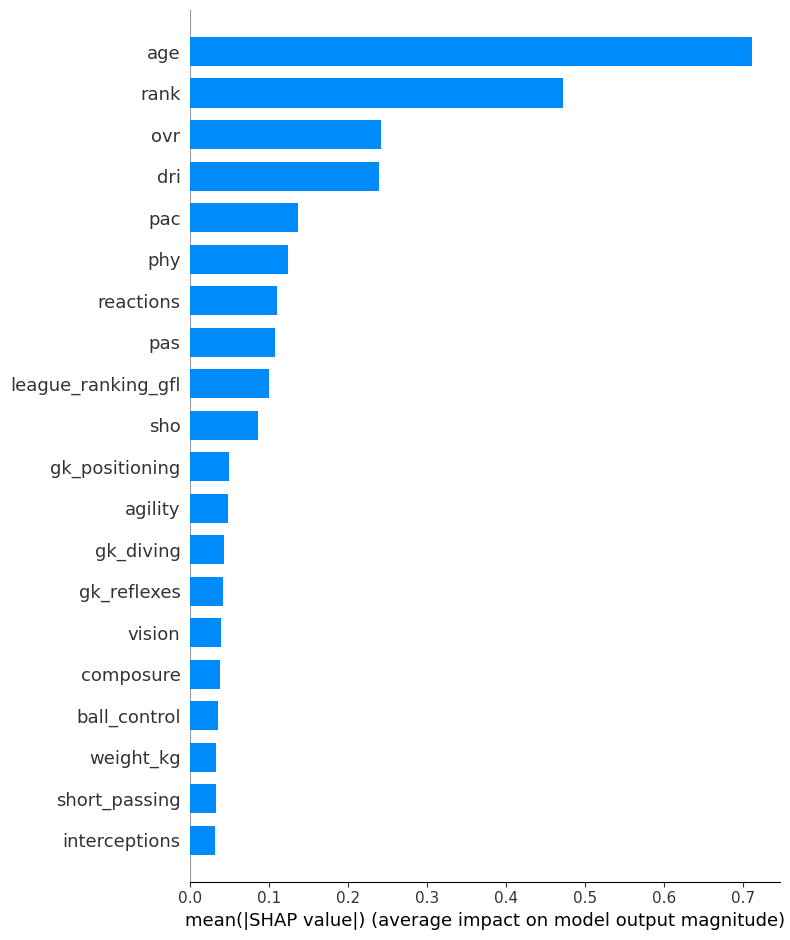

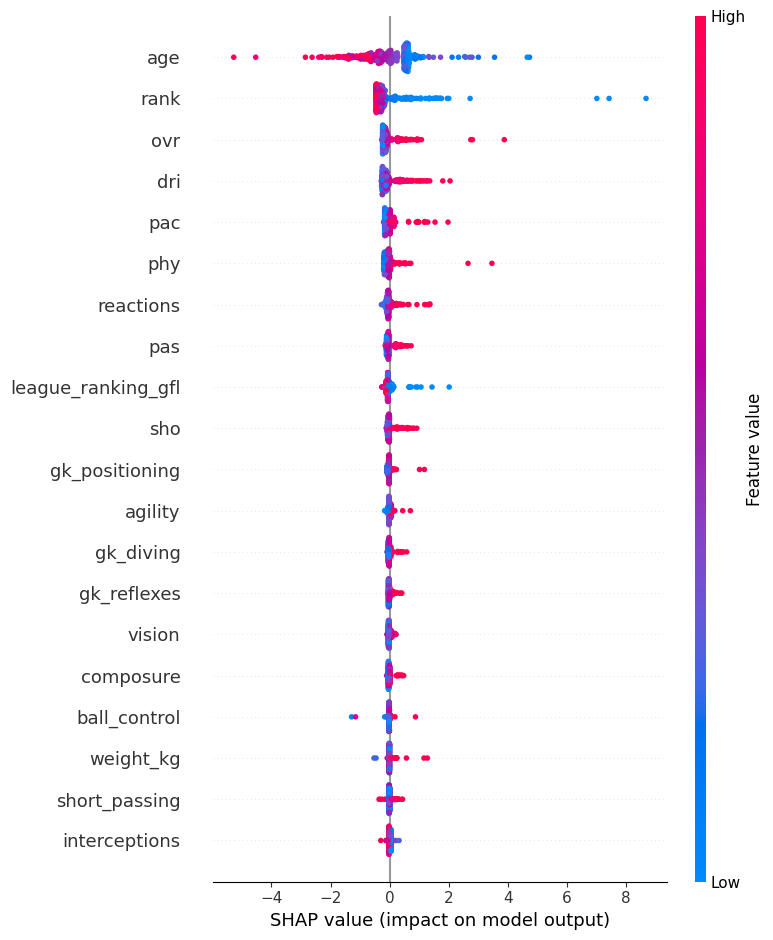

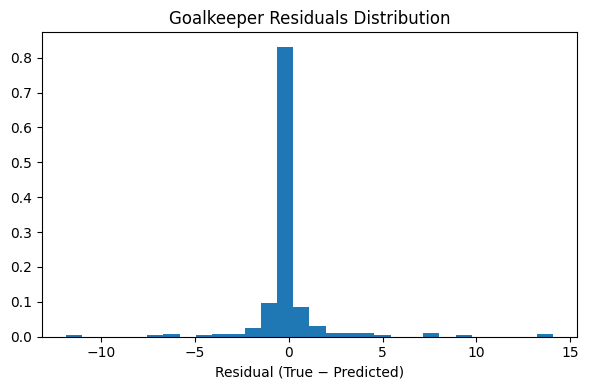

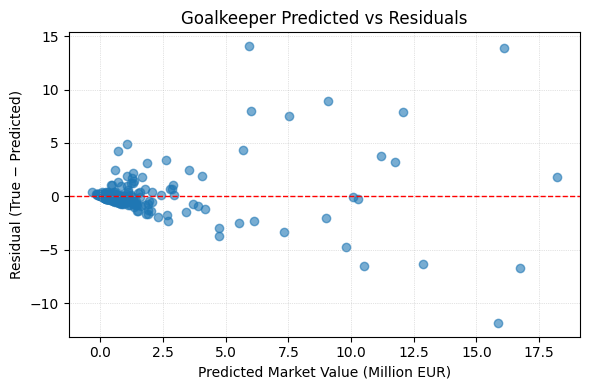

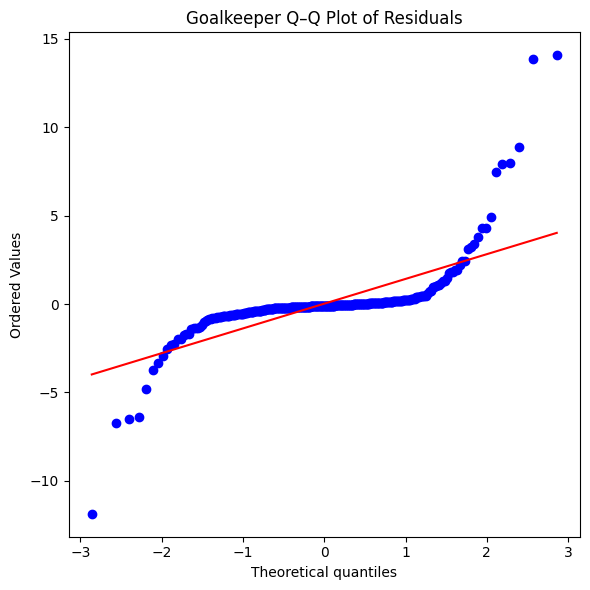

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
import seaborn as sns

# 1. 读取处理好的训练集和测试集
train_df = pd.read_csv('/content/drive/MyDrive/fc25_train_goalkeeper_scaled.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/fc25_test_goalkeeper_scaled.csv')

# 2. 构造 X_train, y_train, X_test, y_test
exclude = ['market_value_in_eur', 'position', 'position_group', 'name']
X_train = train_df.drop(columns=exclude)
y_train = train_df['market_value_in_eur']
X_test  = test_df.drop(columns=exclude)
y_test  = test_df['market_value_in_eur']

# 3. 加载训练好的最佳 RF 模型 (rf_final)，或者直接引用已存在对象
# 假设 rf_final 已经在环境中
# from your_module import rf_final

# 4. SHAP 特征重要性 (使用 TreeExplainer)
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_test)

# 5. 全局重要性条形图
shap.summary_plot(shap_values, X_test, plot_type="bar",
    feature_names=X_test.columns,
    max_display=20)

# 6. Beeswarm 关系图
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,
    max_display=20)

# 7. 残差分析
residuals = y_test - y_pred_3


# 1) 残差分布直方图
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30,density=True)
plt.xlabel("Residual (True − Predicted)")
plt.title("Goalkeeper Residuals Distribution")
plt.tight_layout()
plt.show()

# 2) 预测值 vs 残差 散点图
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_3, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Market Value (Million EUR)")
plt.ylabel("Residual (True − Predicted)")
plt.title("Goalkeeper Predicted vs Residuals")
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# 3) 残差 Q–Q 图
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Goalkeeper Q–Q Plot of Residuals")
plt.tight_layout()
plt.show()